In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

#check to make sure that mouse_id is unique identifier
unique_mouse_id = mouse["Mouse ID"].unique()
#compare length of mouse and length of unique_mouse_id
print(len(mouse))
print(len(unique_mouse_id))
#found get duplicates https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicate_mouse_id = mouse[mouse.duplicated(['Mouse ID'], keep=False)]
print(duplicate_mouse_id)
#for the sake of this homework I am keeping the duplicate Mouse ID (just to make sure my results match the examples) 
#In the real world I would ask for clarification on what drug that mouse actually got or removed it from the analysis.  
#It would not make sense that a mouse got 2 drugs as you wouldn't know which outcomes were due to which drug.
# Combine the data into a single dataset
all_data = pd.merge(mouse,clinical, on ="Mouse ID")


# Display the data table for preview
all_data.head()

250
249
    Mouse ID      Drug
7       g989  Stelasyn
173     g989  Propriva


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [102]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupedDT = all_data.groupby(["Drug", "Timepoint"])
# get the mean and then reset index removes the multi index that creates the pivot like look
meanDT = groupedDT.mean().reset_index()
meanDT_volume = meanDT.loc[:,["Drug","Timepoint", "Tumor Volume (mm3)"]]
# Preview DataFrame
meanDT_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderrDT = groupedDT.sem().reset_index()
stderrDT_volume = stderrDT.loc[:,["Drug","Timepoint", "Tumor Volume (mm3)"]]
# Convert to DataFrame

# Preview DataFrame
stderrDT_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [23]:
# Minor Data Munging to Re-Format the Data Frames
# found https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.pivot.html
stderrDT_volume_pivot = stderrDT_volume.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
meanDT_volume_pivot = meanDT_volume.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
print(stderrDT_volume_pivot.head())
print(meanDT_volume_pivot.head())

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.231708  0.482955  0.239862   0.188950  
10         0.376195  0.720225  0.433678   0.263949  
15         0.466109  0.770432  0.493261   0.370544  
20         0.555181  0.786199  0.621889   0.533182  
Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint               

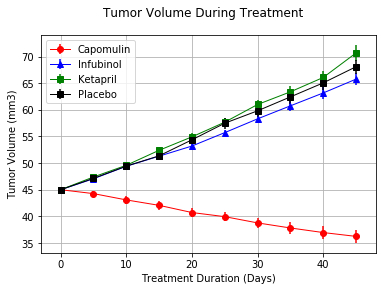

In [107]:
# Generate the Plot (with Error Bars)
#create the subplot for the 4 drugs
fig, ax1 = plt.subplots()
fig.suptitle("Tumor Volume During Treatment")
#create the x axis from the index by turning the index back into a column and turning that column into a list
timepoint = meanDT_volume_pivot.reset_index().iloc[:,0]
capomulin_m = meanDT_volume_pivot.iloc[:,0]
infubinol_m = meanDT_volume_pivot.iloc[:,2]
ketapril_m = meanDT_volume_pivot.iloc[:,3]
placebo_m = meanDT_volume_pivot.iloc[:,5]
capomulin_st = stderrDT_volume_pivot.iloc[:,0]
infubinol_st = stderrDT_volume_pivot.iloc[:,2]
ketapril_st = stderrDT_volume_pivot.iloc[:,3]
placebo_st = stderrDT_volume_pivot.iloc[:,5]
# Save the Figure https://scientificpythonsnippets.com/index.php/2-uncategorised/4-scientific-plotting-with-python-plot-with-error-bars-using-pyplot
ax1.errorbar(timepoint, capomulin_m, yerr=capomulin_st,fmt="rs-",    
            linewidth=1,elinewidth=1.5, ecolor="red",  marker="o")
ax1.errorbar(timepoint, infubinol_m, yerr=infubinol_st,fmt="bs-",    
            linewidth=1,elinewidth=1.5, ecolor="blue",   marker="^")
ax1.errorbar(timepoint, ketapril_m, yerr=ketapril_st,fmt="gs-",    
            linewidth=1,elinewidth=1.5, ecolor="green", marker="s")
ax1.errorbar(timepoint, placebo_m, yerr=placebo_st,fmt="ks-",  
            linewidth=1,elinewidth=1.5, ecolor="black", marker="s")

#plt.setp(ax1, label = "Capomulin")#give label to returned line
plt.legend(numpoints=1,loc=("best"))      
plt.xlim(min(timepoint)-3,max(timepoint)+3)  #Set X-axis limits
#plt.xticks([0,10,20,30,40])               #get only ticks we want
#plt.yticks([30,40, 50])  
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

In [100]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanDT_met = meanDT.loc[:,["Drug","Timepoint", "Metastatic Sites"]]
# Convert to DataFrame

# Preview DataFrame
meanDT_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [103]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderrDT_met = stderrDT.loc[:,["Drug","Timepoint", "Metastatic Sites"]]
# Convert to DataFrame

# Preview DataFrame
stderrDT_met.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [104]:
# Minor Data Munging to Re-Format the Data Frames
# found https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.pivot.html
stderrDT_met_pivot = stderrDT_met.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
meanDT_met_pivot = meanDT_met.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
print(stderrDT_met_pivot.head())
print(meanDT_met_pivot.head())

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.074833  0.108588   0.091652  0.098100  0.093618  0.100947   
10          0.125433  0.152177   0.159364  0.142018  0.163577  0.115261   
15          0.132048  0.180625   0.194015  0.191381  0.158651  0.190221   
20          0.161621  0.241034   0.234801  0.236680  0.181731  0.234064   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.095219  0.066332  0.087178   0.077709  
10         0.105690  0.090289  0.123672   0.109109  
15         0.136377  0.115261  0.153439   0.111677  
20         0.171499  0.119430  0.200905   0.166378  
Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                   

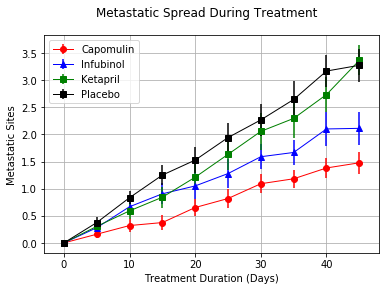

In [108]:
# Generate the Plot (with Error Bars)
#create the subplot for the 4 drugs
fig, ax1 = plt.subplots()
fig.suptitle("Metastatic Spread During Treatment")
#create the x axis from the index by turning the index back into a column and turning that column into a list
timepoint = meanDT_met_pivot.reset_index().iloc[:,0]
capomulin_m = meanDT_met_pivot.iloc[:,0]
infubinol_m = meanDT_met_pivot.iloc[:,2]
ketapril_m = meanDT_met_pivot.iloc[:,3]
placebo_m = meanDT_met_pivot.iloc[:,5]
capomulin_st = stderrDT_met_pivot.iloc[:,0]
infubinol_st = stderrDT_met_pivot.iloc[:,2]
ketapril_st = stderrDT_met_pivot.iloc[:,3]
placebo_st = stderrDT_met_pivot.iloc[:,5]
# Save the Figure https://scientificpythonsnippets.com/index.php/2-uncategorised/4-scientific-plotting-with-python-plot-with-error-bars-using-pyplot
ax1.errorbar(timepoint, capomulin_m, yerr=capomulin_st,fmt="rs-",    
            linewidth=1,elinewidth=1.5, ecolor="red",  marker="o")
ax1.errorbar(timepoint, infubinol_m, yerr=infubinol_st,fmt="bs-",    
            linewidth=1,elinewidth=1.5, ecolor="blue",   marker="^")
ax1.errorbar(timepoint, ketapril_m, yerr=ketapril_st,fmt="gs-",    
            linewidth=1,elinewidth=1.5, ecolor="green", marker="s")
ax1.errorbar(timepoint, placebo_m, yerr=placebo_st,fmt="ks-",  
            linewidth=1,elinewidth=1.5, ecolor="black", marker="s")

#plt.setp(ax1, label = "Capomulin")#give label to returned line
plt.legend(numpoints=1,loc=("best"))      
plt.xlim(min(timepoint)-3,max(timepoint)+3)  #Set X-axis limits
#plt.xticks([0,10,20,30,40])               #get only ticks we want
#plt.yticks([30,40, 50])  
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.show()

In [110]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupedDT = all_data.groupby(["Drug", "Timepoint"])
# get the mean and then reset index removes the multi index that creates the pivot like look
countDT = groupedDT.count().reset_index()
countDT_countonly = countDT.loc[:,["Drug","Timepoint", "Mouse ID"]]
# Preview DataFrame
countDT_countonly.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [111]:
# Minor Data Munging to Re-Format the Data Frames
# found https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.pivot.html
countDT_pivot = countDT_countonly.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")
# Preview that Reformatting worked
countDT_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


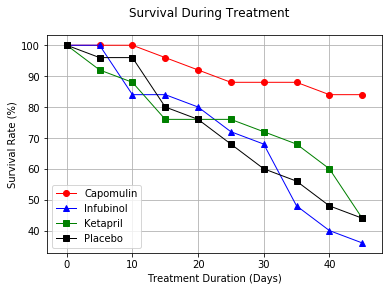

In [115]:
# Generate the Plot (Accounting for percentages)

#create the subplot for the 4 drugs
fig, ax1 = plt.subplots()
fig.suptitle("Survival During Treatment")
#create the x axis from the index by turning the index back into a column and turning that column into a list
timepoint = countDT_pivot.reset_index().iloc[:,0]
#this time divide by count of mice at day 0 to get percent of mice left alive for each timepoint
capomulin_c = (countDT_pivot.iloc[:,0]/countDT_pivot.iloc[0,0])*100
infubinol_c = (countDT_pivot.iloc[:,2]/countDT_pivot.iloc[0,2])*100
ketapril_c = (countDT_pivot.iloc[:,3]/countDT_pivot.iloc[0,3])*100
placebo_c = (countDT_pivot.iloc[:,5]/countDT_pivot.iloc[0,5])*100

# Save the Figure https://scientificpythonsnippets.com/index.php/2-uncategorised/4-scientific-plotting-with-python-plot-with-error-bars-using-pyplot
ax1.errorbar(timepoint, capomulin_c, fmt="rs-",    
            linewidth=1,  marker="o")
ax1.errorbar(timepoint, infubinol_c,fmt="bs-",    
            linewidth=1,   marker="^")
ax1.errorbar(timepoint, ketapril_c,fmt="gs-",    
            linewidth=1, marker="s")
ax1.errorbar(timepoint, placebo_c, fmt="ks-",  
            linewidth=1, marker="s")

#plt.setp(ax1, label = "Capomulin")#give label to returned line
plt.legend(numpoints=1,loc=("best"))      
plt.xlim(min(timepoint)-3,max(timepoint)+3)  #Set X-axis limits
#plt.xticks([0,10,20,30,40])               #get only ticks we want
#plt.yticks([30,40, 50])  
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.show()